# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цели и задачи проекта**

Цель - определить наиболее выгодный для компании тариф, который следует развивать и продвигать.

Задачи проекта:
- проанализировать данные об использовании тарифов на выборке из 500 клиентов
- определить существенные отличия между пользователями внутри выборки
- изучить особенности использования каждого тарифа
- оценить размер выручки, которую приносит каждый тариф

**Осноные этапы выполнения проекта:**
- провести предобработку имеющихся данных на предмет ошибок, пропусков, дубликатов, рассчитать дополнительные показатели
- проанализировать данные с использование статистических и графических методов
- сформулировать и проверить гипотезы относительно исследуемых тарифов
- сделать общий вывод и подвести итоги проекта

**Дополнительная информация**

**Описание тарифов**

1) Тариф «Смарт»
   - Ежемесячная плата: 550 рублей
   - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 3 рубля
        - сообщение: 3 рубля
        - 1 Гб интернет-трафика: 200 рублей

2) Тариф «Ультра»
   - Ежемесячная плата: 1950 рублей
   - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей


# Содержание

1. [Открытие данных](#start)<a id="start2"></a> 
2. [Предобработка данных](#preprocessing)  
    2.1. [Анализ данных на предмет ошибок](#preanalisys)  
    2.2. [Изменение типов данных](#types)  
    2.3. [Добавление расчетных значений](#derivatives)  
      2.3.1. [Расчет потребленных услуг](#derivatives1)  
      2.3.2. [Расчет выручки](#derivatives2)
3. [Анализ данных](#analisys)  
    3.1. [Анализ звонков](#calls_analisys)  
    3.2. [Анализ сообщений](#messages_analisys)  
    3.3. [Анализ трафика](#traffic_analisys)  
4. [Проверка гипотез](#hypothesys)  
    4.1. [Проверка гипотезы 1](#hypothesys1)  
    4.1. [Проверка гипотезы 2](#hypothesys2)
5. [Общий вывод](#conclusion)  

## [Открытие данных](#start2)
<a id="start"></a>

In [1]:
# импортируем библиотеки для работы с данными
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# прочитаем каждый файл по отдельности и выведем на экран для проверки
# воспользуемся конструкцией try-except, чтобы обнаружить ошибки, если они возникнут при чтении
try:
    users = pd.read_csv()
    display(users.head())
except:
    display(f'При чтении файла возникла ошибка.')
    
try:
    calls = pd.read_csv()
    display(calls.head())
except:
    display(f'При чтении файла возникла ошибка.')
    
try:
    messages = pd.read_csv()
    display(messages.head())
except:
    display(f'При чтении файла возникла ошибка.')
    
try:
    internet = pd.read_csv()
    display(internet.head())
except:
    display(f'При чтении файла возникла ошибка.')
    
try:
    tariffs = pd.read_csv()
    display(tariffs.head())
except:
    display(f'При чтении файла возникла ошибка.')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## [Предобработка данных](#start2)
<a id="preprocessing"></a>

### [Анализ данных на предмет ошибок](#start2)
<a id="preanalisys"></a>

In [4]:
# проанализируем данные в таблице users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Ошибки в таблице:** `users`

1. Пропуски в таблице отсутствуют. Колонка `churn_date` не считается в соответствии с условиями проекта.
2. В колонке `churn_date` и `reg_date` тип данных следует заменить на `datetime64`.

In [5]:
# проанализируем данные в таблице calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Ошибки в таблице:** `calls`

1. Пропуски в таблице отсутствуют.
2. В колонке `call_date` тип данных следует заменить на `datetime64`.
3. В колонке `duration` тип данных следует заменить на `int64` и округлить до минут в большую сторону в соответствии с условиями проекта.
4. В колонке `duration` присутствуют нулевые значения. Из условий задачи мы знаем, что это не ошибка. Это значит, что звонок был пропущен. Мы не будем удалять эти значения и оставим их как есть.

In [6]:
# проанализируем данные в таблице messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Ошибки в таблице:** `messages`

1. Пропуски в таблице отсутствуют.
2. В колонке `message_date` тип данных следует заменить на `datetime64`.

In [7]:
# проанализируем данные в таблице internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Ошибки в таблице:** `internet`

1. Пропуски в таблице отсутствуют.
2. В колонке `session_date` тип данных следует заменить на `datetime64`.
3. Колонка `Unnamed: 0`, судя по всему, лишняя и можно ее удалить.

In [8]:
# проанализируем данные в таблице tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Ошибки в таблице:** `tariffs`

1. Пропуски в таблице отсутствуют.

### [Изменение типов данных](#start2)
<a id="types"></a>

In [9]:
# заменим тип данных в колонках churn_date и reg_date таблицы users
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# проверим результат
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# заменим тип данных в колонке call_date таблицы calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# в колонке duration заменим тип данных на `int64` и округлим до минут в большую сторону
calls['duration_rounded'] = np.ceil(calls['duration']).astype('int64')

# проверим результат
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                202607 non-null  object        
 1   call_date         202607 non-null  datetime64[ns]
 2   duration          202607 non-null  float64       
 3   user_id           202607 non-null  int64         
 4   duration_rounded  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,duration_rounded
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [11]:
# заменим тип данных в колонке message_date таблицы messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# проверим результат
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
# заменим тип данных в колонке session_date таблицы internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# удалим ненужную колонку Unnamed: 0
internet = internet.drop(columns = ['Unnamed: 0'], axis = 1)

# проверим результат
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


### [Добавление расчетных значений](#start2)
<a id="derivatives"></a>

Для каждого пользователя посчитаем:
1) количество сделанных звонков и израсходованных минут разговора по месяцам

2) количество отправленных сообщений по месяцам

3) объем израсходованного интернет-трафика по месяцам

4) помесячную выручку с каждого пользователя

#### [Расчет потребленных услуг](#start2)
<a id="derivatives1"></a>

In [13]:
# рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам
# выделим месяц каждого звонка, чтобы иметь возможность группировать данные помесячно
calls['month'] = calls['call_date'].dt.month

# создадим сводную таблицу и добавим колонки с расчетными показателями
calls_grouped = calls.groupby(['user_id', 'month'])['duration_rounded'].agg(['count', 'sum']).reset_index()

# переименуем колонки
calls_grouped = calls_grouped.rename(columns = {'count': 'calls_count', 'sum': 'minutes_used'})

# проверим, что получилось
calls_grouped.head()

,user_id,month,calls_count,minutes_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [14]:
# рассчитаем количество отправленных сообщений по месяцам
# выделим месяц каждого сообщения, чтобы иметь возможность группировать данные помесячно
messages['month'] = messages['message_date'].dt.month

# создадим сводную таблицу и добавим колонки с расчетными показателями
messages_grouped = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()

# переименуем колонки
messages_grouped = messages_grouped.rename(columns = {'count': 'messages_used'})

# проверим, что получилось
messages_grouped.head()

,user_id,month,messages_used
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [15]:
# рассчитаем объем израсходованного интернет-трафика по месяцам
# выделим месяц, чтобы иметь возможность группировать данные помесячно
internet['month'] = internet['session_date'].dt.month

# создадим сводную таблицу и добавим колонки с расчетными показателями
internet_grouped = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()

# переименуем колонки
internet_grouped = internet_grouped.rename(columns = {'sum': 'mb_used'})

# округлим израсходованный траффик в соответствии с условиями
internet_grouped['gb_used'] = internet_grouped['mb_used'] / 1024 
internet_grouped['gb_used_rounded'] = np.ceil(internet_grouped['gb_used']).astype('int64')

# проверим, что получилось
internet_grouped.head()

,user_id,month,mb_used,gb_used,gb_used_rounded
0,1000,5,2253.49,2.200674,3
1,1000,6,23233.77,22.689229,23
2,1000,7,14003.64,13.675430,14
3,1000,8,14055.93,13.726494,14
4,1000,9,14568.91,14.227451,15


#### [Расчет выручки](#start2)
<a id="derivatives2"></a>

Рассчитаем помесячную выручку с каждого пользователя. Для этого:
1. Объединим ранее созданные таблицы `calls_grouped`, `messages_grouped`, `internet_grouped` по колонкам `user_id` и `month`.
2. Добавим в объединенную таблицу информацию по пользователям и тарифам.
3. Рассчитаем выручку по каждой строке объединенной таблицы.

Для объединения таблиц в п.1 используем метод `merge()` последовательно для каждой пары таблиц. Знаем, что есть альтернативный метод `join()`, который позволяет объединять сразу несколько таблиц. Но чтобы иметь возможность пошагово проверять результат, мы будем использовать `merge()`.

In [16]:
# объединим ранее созданные таблицы и запишем в новую переменную
# последовательно для каждой пары таблиц используем метод merge
agg_data = calls_grouped.merge(messages_grouped, on = ('user_id', 'month'), how = 'outer').reset_index(drop=True)

# промежуточная проверка результата
display(agg_data.head())

agg_data = agg_data.merge(internet_grouped, on = ('user_id', 'month'), how = 'outer').reset_index(drop=True)

# проверка результата
display(agg_data.info())
agg_data.head()

,user_id,month,calls_count,minutes_used,messages_used
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   calls_count      3174 non-null   float64
 3   minutes_used     3174 non-null   float64
 4   messages_used    2717 non-null   float64
 5   mb_used          3203 non-null   float64
 6   gb_used          3203 non-null   float64
 7   gb_used_rounded  3203 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 201.0 KB


None

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,3.0
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,23.0
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,14.0
3,1000,8,52.0,408.0,81.0,14055.93,13.726494,14.0
4,1000,9,58.0,466.0,57.0,14568.91,14.227451,15.0


In [17]:
# добавим в объединенную таблицу информацию по пользователям и тарифам из соответствующих датасетов
agg_data = agg_data.merge(users, on = 'user_id').reset_index(drop=True)

# промежуточная проверка результата
display(agg_data.head())

agg_data = agg_data.merge(tariffs, left_on='tariff', right_on='tariff_name').reset_index(drop=True)

# проверка результата
display(agg_data.info())
agg_data.head()

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,13.726494,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,14.227451,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_count            3174 non-null   float64       
 3   minutes_used           3174 non-null   float64       
 4   messages_used          2717 non-null   float64       
 5   mb_used                3203 non-null   float64       
 6   gb_used                3203 non-null   float64       
 7   gb_used_rounded        3203 non-null   float64       
 8   age                    3214 non-null   int64         
 9   churn_date             187 non-null    datetime64[ns]
 10  city                   3214 non-null   object        
 11  first_name             3214 non-null   object        
 12  last_name              3214 non-null   object        
 13  reg

None

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,159.0,22.0,2253.49,2.200674,3.0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,172.0,60.0,23233.77,22.689229,23.0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,340.0,75.0,14003.64,13.675430,14.0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,408.0,81.0,14055.93,13.726494,14.0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,466.0,57.0,14568.91,14.227451,15.0,52,NaT,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [18]:
# для удобства дальнейших расчетов добавим колонку 
# с размером интернет-трафика, включенного в тариф, в Гб
agg_data['gb_per_month_included'] = agg_data['mb_per_month_included'] / 1024 

# проверим, что получилось
agg_data['gb_per_month_included'].value_counts()

15.0    2229
30.0     985
Name: gb_per_month_included, dtype: int64

In [19]:
# некоторые колонки после объединения изменили тип данных на дробный и получили пропуски
# вернем им целочисленный тип данных перед этим заменив пропуски на 0
display(agg_data.info())

# создадим список колонок, над которыми нужно выполнить преобразования
columns = ['calls_count', 'minutes_used', 'messages_used', 'gb_used_rounded', 'gb_per_month_included']

# циклом пройдемся по списку колонок и выполним преобразования
for column in columns:
    agg_data[column] = agg_data[column].fillna(0).astype('int64')

# проверим результат
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_count            3174 non-null   float64       
 3   minutes_used           3174 non-null   float64       
 4   messages_used          2717 non-null   float64       
 5   mb_used                3203 non-null   float64       
 6   gb_used                3203 non-null   float64       
 7   gb_used_rounded        3203 non-null   float64       
 8   age                    3214 non-null   int64         
 9   churn_date             187 non-null    datetime64[ns]
 10  city                   3214 non-null   object        
 11  first_name             3214 non-null   object        
 12  last_name              3214 non-null   object        
 13  reg

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_count            3214 non-null   int64         
 3   minutes_used           3214 non-null   int64         
 4   messages_used          3214 non-null   int64         
 5   mb_used                3203 non-null   float64       
 6   gb_used                3203 non-null   float64       
 7   gb_used_rounded        3214 non-null   int64         
 8   age                    3214 non-null   int64         
 9   churn_date             187 non-null    datetime64[ns]
 10  city                   3214 non-null   object        
 11  first_name             3214 non-null   object        
 12  last_name              3214 non-null   object        
 13  reg

In [20]:
# рассчитаем выручку по каждому пользователю в разрезе месяцов:
# вычтем бесплатный лимит из суммарного количества звонков / сообщений / интернет-трафика
# остаток умножим на значение из тарифного плана

# создадим колонку для расчета дополнительной выручки по каждому виду услуг, без учета абонентской платы за тариф
agg_data['calls_revenue'] = 0

for i in range(len(agg_data['user_id'])): # создадим цикл для обработки каждой строки датасета по индексу
    if (agg_data.loc[i,'minutes_used'] - agg_data.loc[i,'minutes_included']) > 0: # если абонент превысил бесплатный лимит по минутам
        agg_data.loc[i,'calls_revenue'] = (
            (agg_data.loc[i,'minutes_used'] - 
             agg_data.loc[i,'minutes_included']) * 
            agg_data.loc[i,'rub_per_minute']
        ) # сумму услуг, превышающую лимит, умножим на ставку из тарифа
    else:
        agg_data.loc[i,'calls_revenue'] = 0 # если превышения нет, то дополнительной платы не будет

# проверим результат
display(agg_data.tail(10))

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,calls_revenue
3204,1498,10,41,247,42,20579.36,20.097031,21,68,2018-10-25,...,50,15360,500,550,200,3,3,smart,15,0
3205,1499,9,9,70,11,1845.75,1.802490,2,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3206,1499,10,68,449,48,17788.51,17.371592,18,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3207,1499,11,74,612,59,17963.31,17.542295,18,35,NaT,...,50,15360,500,550,200,3,3,smart,15,336
3208,1499,12,69,492,66,13055.58,12.749590,13,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3209,1489,8,0,0,17,11050.56,10.791562,11,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3210,1489,9,0,0,32,17206.30,16.803027,17,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3211,1489,10,0,0,21,19559.44,19.101016,20,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3212,1489,11,0,0,20,17491.56,17.081602,18,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0
3213,1489,12,0,0,35,17322.51,16.916514,17,35,NaT,...,50,15360,500,550,200,3,3,smart,15,0


In [21]:
# рассчитаем выручку по каждому пользователю в разрезе месяцов:
# вычтем бесплатный лимит из суммарного количества звонков / сообщений / интернет-трафика
# остаток умножим на значение из тарифного плана

# создадим колонку для расчета дополнительной выручки по каждому виду услуг, без учета абонентской платы за тариф
agg_data['messages_revenue'] = 0

for i in range(len(agg_data['user_id'])): # создадим цикл для обработки каждой строки датасета по индексу
    if (agg_data.loc[i,'messages_used'] - agg_data.loc[i,'messages_included']) > 0: # если абонент превысил бесплатный лимит по минутам
        agg_data.loc[i,'messages_revenue'] = (
            (agg_data.loc[i,'messages_used'] - 
             agg_data.loc[i,'messages_included']) * 
            agg_data.loc[i,'rub_per_message']
        ) # сумму услуг, превышающую лимит, умножим на ставку из тарифа
    else:
        agg_data.loc[i,'messages_revenue'] = 0 # если превышения нет, то дополнительной платы не будет

# проверим результат
display(agg_data.tail(10))

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,calls_revenue,messages_revenue
3204,1498,10,41,247,42,20579.36,20.097031,21,68,2018-10-25,...,15360,500,550,200,3,3,smart,15,0,0
3205,1499,9,9,70,11,1845.75,1.802490,2,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3206,1499,10,68,449,48,17788.51,17.371592,18,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3207,1499,11,74,612,59,17963.31,17.542295,18,35,NaT,...,15360,500,550,200,3,3,smart,15,336,27
3208,1499,12,69,492,66,13055.58,12.749590,13,35,NaT,...,15360,500,550,200,3,3,smart,15,0,48
3209,1489,8,0,0,17,11050.56,10.791562,11,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3210,1489,9,0,0,32,17206.30,16.803027,17,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3211,1489,10,0,0,21,19559.44,19.101016,20,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3212,1489,11,0,0,20,17491.56,17.081602,18,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0
3213,1489,12,0,0,35,17322.51,16.916514,17,35,NaT,...,15360,500,550,200,3,3,smart,15,0,0


In [22]:
# рассчитаем выручку по каждому пользователю в разрезе месяцов:
# вычтем бесплатный лимит из суммарного количества звонков / сообщений / интернет-трафика
# остаток умножим на значение из тарифного плана

# создадим колонку для расчета дополнительной выручки по каждому виду услуг, без учета абонентской платы за тариф
agg_data['traffic_revenue'] = 0

for i in range(len(agg_data['user_id'])): # создадим цикл для обработки каждой строки датасета по индексу
    if (agg_data.loc[i,'gb_used_rounded'] - agg_data.loc[i,'gb_per_month_included']) > 0: # если абонент превысил бесплатный лимит по минутам
        agg_data.loc[i,'traffic_revenue'] = (
            (agg_data.loc[i,'gb_used_rounded'] - 
             agg_data.loc[i,'gb_per_month_included']) * 
            agg_data.loc[i,'rub_per_gb']
        ) # сумму услуг, превышающую лимит, умножим на ставку из тарифа
    else:
        agg_data.loc[i,'traffic_revenue'] = 0 # если превышения нет, то дополнительной платы не будет

# проверим результат
display(agg_data.tail(10))

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,calls_revenue,messages_revenue,traffic_revenue
3204,1498,10,41,247,42,20579.36,20.097031,21,68,2018-10-25,...,500,550,200,3,3,smart,15,0,0,1200
3205,1499,9,9,70,11,1845.75,1.802490,2,35,NaT,...,500,550,200,3,3,smart,15,0,0,0
3206,1499,10,68,449,48,17788.51,17.371592,18,35,NaT,...,500,550,200,3,3,smart,15,0,0,600
3207,1499,11,74,612,59,17963.31,17.542295,18,35,NaT,...,500,550,200,3,3,smart,15,336,27,600
3208,1499,12,69,492,66,13055.58,12.749590,13,35,NaT,...,500,550,200,3,3,smart,15,0,48,0
3209,1489,8,0,0,17,11050.56,10.791562,11,35,NaT,...,500,550,200,3,3,smart,15,0,0,0
3210,1489,9,0,0,32,17206.30,16.803027,17,35,NaT,...,500,550,200,3,3,smart,15,0,0,400
3211,1489,10,0,0,21,19559.44,19.101016,20,35,NaT,...,500,550,200,3,3,smart,15,0,0,1000
3212,1489,11,0,0,20,17491.56,17.081602,18,35,NaT,...,500,550,200,3,3,smart,15,0,0,600
3213,1489,12,0,0,35,17322.51,16.916514,17,35,NaT,...,500,550,200,3,3,smart,15,0,0,400


In [23]:
# сложим абонентскую плату и плату за превышение тарифа по услугам
agg_data['total_revenue'] = (
    agg_data['calls_revenue'] +
    agg_data['messages_revenue'] +
    agg_data['traffic_revenue'] +
    agg_data['rub_monthly_fee']
)

# проверим результат
display(agg_data.tail(10))

,user_id,month,calls_count,minutes_used,messages_used,mb_used,gb_used,gb_used_rounded,age,churn_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,calls_revenue,messages_revenue,traffic_revenue,total_revenue
3204,1498,10,41,247,42,20579.36,20.097031,21,68,2018-10-25,...,550,200,3,3,smart,15,0,0,1200,1750
3205,1499,9,9,70,11,1845.75,1.802490,2,35,NaT,...,550,200,3,3,smart,15,0,0,0,550
3206,1499,10,68,449,48,17788.51,17.371592,18,35,NaT,...,550,200,3,3,smart,15,0,0,600,1150
3207,1499,11,74,612,59,17963.31,17.542295,18,35,NaT,...,550,200,3,3,smart,15,336,27,600,1513
3208,1499,12,69,492,66,13055.58,12.749590,13,35,NaT,...,550,200,3,3,smart,15,0,48,0,598
3209,1489,8,0,0,17,11050.56,10.791562,11,35,NaT,...,550,200,3,3,smart,15,0,0,0,550
3210,1489,9,0,0,32,17206.30,16.803027,17,35,NaT,...,550,200,3,3,smart,15,0,0,400,950
3211,1489,10,0,0,21,19559.44,19.101016,20,35,NaT,...,550,200,3,3,smart,15,0,0,1000,1550
3212,1489,11,0,0,20,17491.56,17.081602,18,35,NaT,...,550,200,3,3,smart,15,0,0,600,1150
3213,1489,12,0,0,35,17322.51,16.916514,17,35,NaT,...,550,200,3,3,smart,15,0,0,400,950


## [Анализ данных](#start2)
<a id="analisys"></a>

В рамках данного шага мы опишем поведение клиентов оператора, исходя из выборки. Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [24]:
# чтобы упростить работу с таблицей, вынесем полезные колонки в отдельный датасет
display(agg_data.info())
clean_agg_data = agg_data.drop(
    ['mb_used', 
     'gb_used', 
     'messages_included', 
     'mb_per_month_included', 
     'minutes_included', 
     'rub_monthly_fee', 
     'rub_per_gb', 
     'rub_per_message', 
     'rub_per_minute', 
     'gb_per_month_included', 
     'first_name', 
     'last_name'
    ], axis=1
)

display(clean_agg_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_count            3214 non-null   int64         
 3   minutes_used           3214 non-null   int64         
 4   messages_used          3214 non-null   int64         
 5   mb_used                3203 non-null   float64       
 6   gb_used                3203 non-null   float64       
 7   gb_used_rounded        3214 non-null   int64         
 8   age                    3214 non-null   int64         
 9   churn_date             187 non-null    datetime64[ns]
 10  city                   3214 non-null   object        
 11  first_name             3214 non-null   object        
 12  last_name              3214 non-null   object        
 13  reg

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3214 non-null   int64         
 1   month             3214 non-null   int64         
 2   calls_count       3214 non-null   int64         
 3   minutes_used      3214 non-null   int64         
 4   messages_used     3214 non-null   int64         
 5   gb_used_rounded   3214 non-null   int64         
 6   age               3214 non-null   int64         
 7   churn_date        187 non-null    datetime64[ns]
 8   city              3214 non-null   object        
 9   reg_date          3214 non-null   datetime64[ns]
 10  tariff            3214 non-null   object        
 11  tariff_name       3214 non-null   object        
 12  calls_revenue     3214 non-null   int64         
 13  messages_revenue  3214 non-null   int64         
 14  traffic_revenue   3214 n

None

### [Анализ звонков](#start2)
<a id="calls_analisys"></a>

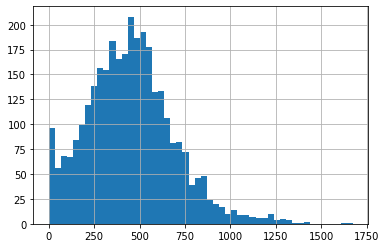

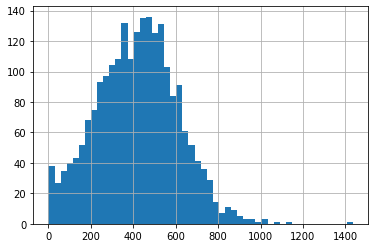

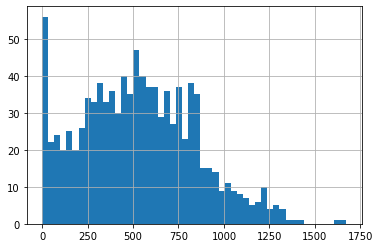

In [25]:
# построим гистограмму для всего множества значений объема потребления услуги
clean_agg_data['minutes_used'].hist(bins=50)
plt.show()

# построим гистограмму отдельно для тарифа smart
clean_agg_data.query('tariff == "smart"')['minutes_used'].hist(bins=50, label='smart')
plt.show()

# построим гистограмму отдельно для тарифа ultra
clean_agg_data.query('tariff == "ultra"')['minutes_used'].hist(bins=50)
plt.show()

In [26]:
# рассчитаем среднее, дисперсию и стандартное отклонение для всей выборки и кажого тарифа в отдельности
print(f'Вся выборка')
print(f'Среднее {clean_agg_data["minutes_used"].mean()}')
print(f'Дисперсия {np.var(clean_agg_data["minutes_used"], ddof=1)}')
print(f'Стандартное отклонение {np.std(clean_agg_data["minutes_used"], ddof=1)}')
print()

print(f'smart')
smart_mean_minutes = clean_agg_data.query('tariff == "smart"')['minutes_used'].mean()
print(f'Среднее {smart_mean_minutes}')
smart_var_minutes = np.var(clean_agg_data.query('tariff == "smart"')['minutes_used'], ddof=1)
print(f'Дисперсия {smart_var_minutes}')
smart_std_minutes = np.std(clean_agg_data.query('tariff == "smart"')['minutes_used'], ddof=1)
print(f'Стандартное отклонение {smart_std_minutes}')
print()

print(f'ultra')
ultra_mean_minutes = clean_agg_data.query('tariff == "ultra"')['minutes_used'].mean()
print(f'Среднее {ultra_mean_minutes}')
ultra_var_minutes = np.var(clean_agg_data.query('tariff == "ultra"')['minutes_used'], ddof=1)
print(f'Дисперсия {ultra_var_minutes}')
ultra_std_minutes = np.std(clean_agg_data.query('tariff == "ultra"')['minutes_used'], ddof=1)
print(f'Стандартное отклонение {ultra_std_minutes}')

Вся выборка
Среднее 451.2448662103298
Дисперсия 58520.43768761049
Стандартное отклонение 241.90997847879382

smart
Среднее 417.9349484073576
Дисперсия 36219.31578434428
Стандартное отклонение 190.31372988921288

ultra
Среднее 526.6233502538071
Дисперсия 100873.63339730098
Стандартное отклонение 317.6060978591264


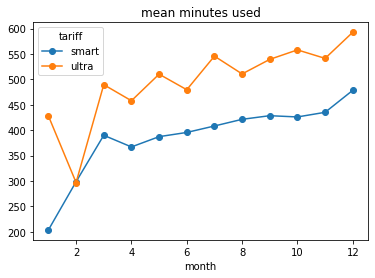

In [27]:
# посмотрим на динамику среднего значения по месяцам по каждому тарифу
clean_agg_data.pivot_table(
    index = 'month', 
    columns = 'tariff',
    values = 'minutes_used',
    aggfunc = 'mean'
).plot(title='mean minutes used', style='o-')
plt.show()

**Вывод**

1. Потраченные минуты имеют нормальное распределение как по общей выборке, так и по каждому тарифу в отдельности. По всем выборкам присутсвует скошенность вправо.
2. Среднее ежемесячное потребление на тарифе ultra стабильно больше, чем на тарифе smart.
3. Дисперсия и стандартное отклонение значений на тарифе ultra значительно выше. Ежемесячное использование более волатильное, чем на тарифе smart.
4. По обоим тарифам наблюдается рост среднемесячного использования минут от начала года к концу.

### [Анализ сообщений](#start2)
<a id="messages_analisys"></a>

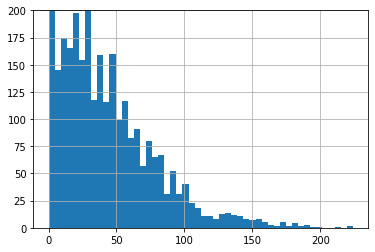

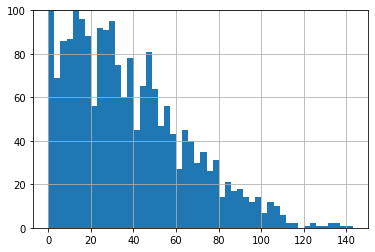

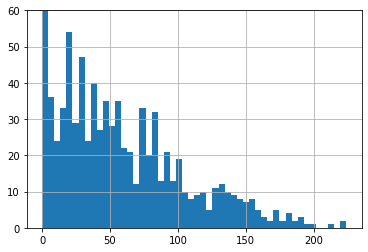

In [28]:
# построим гистограмму для всего множества значений объема потребления услуги
clean_agg_data['messages_used'].hist(bins=50)
plt.ylim(0, 200)
plt.show()

# построим гистограмму отдельно для тарифа smart
clean_agg_data.query('tariff == "smart"')['messages_used'].hist(bins=50, label='smart')
plt.ylim(0, 100)
plt.show()

# построим гистограмму отдельно для тарифа ultra
clean_agg_data.query('tariff == "ultra"')['messages_used'].hist(bins=50)
plt.ylim(0, 60)
plt.show()

In [29]:
# рассчитаем среднее, дисперсию и стандартное отклонение для всей выборки и кажого тарифа в отдельности
print(f'Вся выборка')
print(f'Среднее {clean_agg_data["messages_used"].mean()}')
print(f'Дисперсия {np.var(clean_agg_data["messages_used"], ddof=1)}')
print(f'Стандартное отклонение {np.std(clean_agg_data["messages_used"], ddof=1)}')
print()

print(f'smart')
smart_mean_messages = clean_agg_data.query('tariff == "smart"')['messages_used'].mean()
print(f'Среднее {smart_mean_messages}')
smart_var_messages = np.var(clean_agg_data.query('tariff == "smart"')['messages_used'], ddof=1)
print(f'Дисперсия {smart_var_messages}')
smart_std_messages = np.std(clean_agg_data.query('tariff == "smart"')['messages_used'], ddof=1)
print(f'Стандартное отклонение {smart_std_messages}')
print()

print(f'ultra')
ultra_mean_messages = clean_agg_data.query('tariff == "ultra"')['messages_used'].mean()
print(f'Среднее {ultra_mean_messages}')
ultra_var_messages = np.var(clean_agg_data.query('tariff == "ultra"')['messages_used'], ddof=1)
print(f'Дисперсия {ultra_var_messages}')
ultra_std_messages = np.std(clean_agg_data.query('tariff == "ultra"')['messages_used'], ddof=1)
print(f'Стандартное отклонение {ultra_std_messages}')

Вся выборка
Среднее 38.28126944617299
Дисперсия 1306.7014417742482
Стандартное отклонение 36.14832557358982

smart
Среднее 33.384028712427096
Дисперсия 796.8129584480083
Стандартное отклонение 28.22787555676141

ultra
Среднее 49.36345177664975
Дисперсия 2285.2661425446736
Стандартное отклонение 47.804457350174715


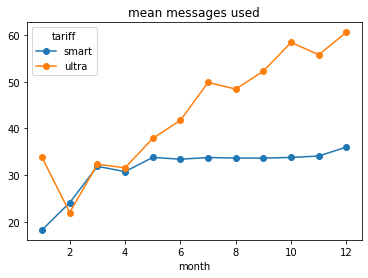

In [30]:
# посмотрим на динамику среднего значения по месяцам по каждому тарифу
clean_agg_data.pivot_table(
    index = 'month', 
    columns = 'tariff',
    values = 'messages_used',
    aggfunc = 'mean'
).plot(title='mean messages used', style='o-')
plt.show()

**Вывод**

1. Потраченные сообщения имеют нормальное распределение как по общей выборке, так и по каждому тарифу в отдельности. По всем выборкам присутсвует сильная скошенность вправо.
2. Среднее ежемесячное потребление на тарифе ultra больше, чем на тарифе smart. Существенный отрыв начинается с апреля и увеличивается вплоть до декабря.
3. Дисперсия и стандартное отклонение значений на тарифе ultra значительно выше. Ежемесячное использование более волатильное, чем на тарифе smart.
4. По тарифу ultra наблюдается рост среднемесячного использования сообщений. На тарифе smart количество сообщений почти не меняется.

### [Анализ трафика](#start2)
<a id="traffic_analisys"></a>

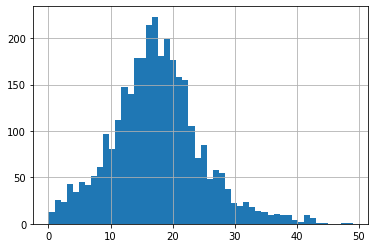

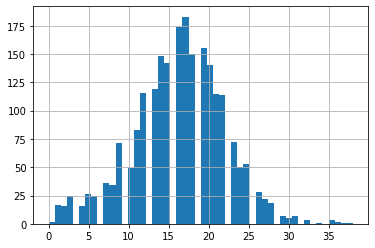

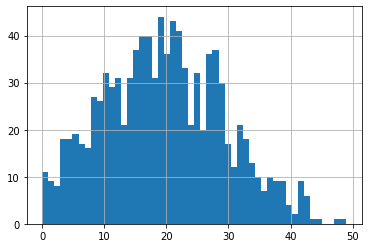

In [31]:
# построим гистограмму для всего множества значений объема потребления услуги
clean_agg_data['gb_used_rounded'].hist(bins=50)
# plt.ylim(0, 200)
plt.show()

# построим гистограмму отдельно для тарифа smart
clean_agg_data.query('tariff == "smart"')['gb_used_rounded'].hist(bins=50, label='smart')
# plt.ylim(0, 100)
plt.show()

# построим гистограмму отдельно для тарифа ultra
clean_agg_data.query('tariff == "ultra"')['gb_used_rounded'].hist(bins=50)
# plt.ylim(0, 60)
plt.show()

In [32]:
# рассчитаем среднее, дисперсию и стандартное отклонение для всей выборки и кажого тарифа в отдельности
print(f'Вся выборка')
print(f'Среднее {clean_agg_data["gb_used_rounded"].mean()}')
print(f'Дисперсия {np.var(clean_agg_data["gb_used_rounded"], ddof=1)}')
print(f'Стандартное отклонение {np.std(clean_agg_data["gb_used_rounded"], ddof=1)}')
print()

print(f'smart')
smart_mean_traffic = clean_agg_data.query('tariff == "smart"')['gb_used_rounded'].mean()
print(f'Среднее {smart_mean_traffic}')
smart_var_traffic = np.var(clean_agg_data.query('tariff == "smart"')['gb_used_rounded'], ddof=1)
print(f'Дисперсия {smart_var_traffic}')
smart_std_traffic = np.std(clean_agg_data.query('tariff == "smart"')['gb_used_rounded'], ddof=1)
print(f'Стандартное отклонение {smart_std_traffic}')
print()

print(f'ultra')
ultra_mean_traffic = clean_agg_data.query('tariff == "ultra"')['gb_used_rounded'].mean()
print(f'Среднее {ultra_mean_traffic}')
ultra_var_traffic = np.var(clean_agg_data.query('tariff == "ultra"')['gb_used_rounded'], ddof=1)
print(f'Дисперсия {ultra_var_traffic}')
ultra_std_traffic = np.std(clean_agg_data.query('tariff == "ultra"')['gb_used_rounded'], ddof=1)
print(f'Стандартное отклонение {ultra_std_traffic}')

Вся выборка
Среднее 17.29900435594275
Дисперсия 54.76864513350108
Стандартное отклонение 7.400584107589149

smart
Среднее 16.328847016599372
Дисперсия 33.02870517811161
Стандартное отклонение 5.7470605685090534

ultra
Среднее 19.494416243654822
Дисперсия 97.09168626965459
Стандартное отклонение 9.853511367510293


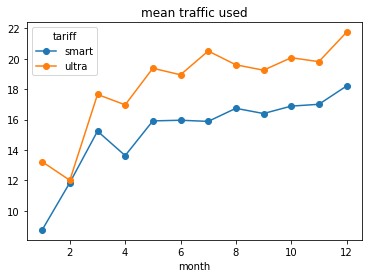

In [33]:
# посмотрим на динамику среднего значения по месяцам по каждому тарифу
clean_agg_data.pivot_table(
    index = 'month', 
    columns = 'tariff',
    values = 'gb_used_rounded',
    aggfunc = 'mean'
).plot(title='mean traffic used', style='o-')
plt.show()

**Вывод**

1. Использованный траффик имеет нормальное распределение как по общей выборке, так и по каждому тарифу в отдельности. Скошенность прослеживается с трудом.
2. Среднее ежемесячное потребление на тарифе ultra больше, чем на тарифе smart. Дельта относительно стабильная, разрыв не растет.
3. Дисперсия и стандартное отклонение значений на тарифе ultra значительно выше. Ежемесячное использование более волатильное, чем на тарифе smart.
4. По обоим тарифам наблюдается рост использования траффика к концу года.

## [Проверка гипотез](#start2)
<a id="hypothesys"></a>

На данном шаге проверим две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Поясним:
- как мы формулировали нулевую и альтернативную гипотезы;
- какой критерий мы использовали для проверки гипотез и почему.

### [Проверка гипотезы 1](#start2)
<a id="hypothesys1"></a>

На данном этапе нам необходимо проверить гипотезу о том, различается ли средняя выручка пользователей тарифов Ультра и Смарт. При формулировке нулевой и альтернативной гипотезы учтем, что нулевая должна содержать равенство, а альтернативная, напротив, неравенство.

H0 - средняя выручка пользователей тарифов Ультра РАВНО средняя выручка пользователей тарифов Смарт
H1 - средняя выручка пользователей тарифов Ультра НЕ РАВНО средняя выручка пользователей тарифов Смарт

Для проверки гипотезы мы должны задать уровень значимости и выбрать метод.
Уровень значимости alpha зададим на уровне общепринятого значения 5%.
В качестве метода проверки выберем `scipy.stats.ttest_ind()`, так как нам необходимо сравнить между собой средние двух генеральных совокупностей на основании выборок из них. Одна совокупность - это пользователи тарифа Ультра, другая - пользователи тарифа Смарт.

In [34]:
smart_revenue = clean_agg_data.query('tariff == "smart"')['total_revenue']
ultra_revenue = clean_agg_data.query('tariff == "ultra"')['total_revenue']

alpha = .05

results = st.ttest_ind(
    smart_revenue,
    ultra_revenue,
    equal_var = False
)

print('p-значение: ', results.pvalue)

p-значение:  4.2606313931076085e-250


**Вывод**

Полученное значение p-value находится в пределах уровня значимости. Более того, оно ничтожно мало. Это значит, что мы можем отвергнуть нулевую гипотезу. Иными словами, вероятность того, что средняя выручка пользователей тарифа Ультра равна средней выручке пользователей тарифа Смарт крайне мала. А значит средние значения выручки двух тарифов различаются.

### [Проверка гипотезы 2](#start2)
<a id="hypothesys2"></a>

На данном этапе нам необходимо проверить гипотезу о том, различается ли средняя выручка пользователей из Москвы и из других регионов. При формулировке нулевой и альтернативной гипотезы учтем, что нулевая должна содержать равенство, а альтернативная, напротив, неравенство.

H0 - средняя выручка пользователей из Москвы РАВНО средняя выручка пользователей из регионов
H1 - средняя выручка пользователей из Москвы НЕ РАВНО средняя выручка пользователей из регионов

Для проверки гипотезы мы должны задать уровень значимости и выбрать метод.
Уровень значимости alpha зададим на уровне общепринятого значения 5%.
В качестве метода проверки выберем `scipy.stats.ttest_ind()`, так как нам необходимо сравнить между собой средние двух генеральных совокупностей на основании выборок из них. Одна совокупность - это пользователи из Москвы, другая - пользователи из регионов.

In [35]:
capital_revenue = clean_agg_data.query('city == "Москва"')['total_revenue']
regions_revenue = clean_agg_data.query('city != "Москва"')['total_revenue']

alpha = .05

results = st.ttest_ind(
    capital_revenue,
    regions_revenue, 
    equal_var = False
)

print('p-значение: ', results.pvalue)

p-значение:  0.5257376663729298


**Вывод**

Полученное значение p-value превышает уровень значимости. Это значит, что мы не можем отвергнуть нулевую гипотезу. Иными словами, есть достоточно высокая вероятность того, что средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.

## [Общий вывод](#start2)
<a id="conclusion"></a>

В рамках проекта перед нами стояла задача определить, какой из двух тарифов компании Мегалайн наиболее выгодный. Для анализа нам была предоставлена статистика использования тарифов пятиста клинетами компании.

В процессе работы с предоставленными данными мы проверили их предмет ошибок и неверных типов данных, объединили несколько исходных таблиц, провели расчеты дополнительных показателей, включая выручку.

В рамках анализа данных мы оценили информацию по каждой отдельной услуге в рамках тарифов, определили сходства и различия между тарифами, выявили соотношение величины и динамики выручки.

В заключении мы сформулировали и проверили две гипотезы - о равенстве средней выручки между тарифами и о равенстве средней выручки между пользователями из Москвы и из других регионов.

По итогу проекта мы можем сказать следующее:
- объем пользования услугами в рамках тарифа Ультра больше, чем тарифа Смарт.
- динамика пользования услугами между тарифами примерно одинаковая, за исключением сообщений. Пользователи тарифа Ультра активно увеличивают объем использования сообщений.
- средняя выручка между тарифами отличается.
- на среднюю выручку не влияет то, из какого города пользователь.

Для окончательного заключения, какой тариф лучше, нам не хватет данных о средней выручке в разрезе тарифов.

In [36]:
# найдем среднюю выручку в разрезе тарифов
clean_agg_data.pivot_table(index = 'tariff', values = 'total_revenue', aggfunc = 'mean')

,total_revenue
tariff,
smart,1289.973531
ultra,2070.152284


С учетом вышесказанного, а также принимая во внимание, что средняя выручка по тарифу Ультра в полтора раза больше, чем по тарифу Смарт, делаем вывод, что тариф Ультра более перспективный и прибыльный.